### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

### Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the Dataset

In [ ]:
col_list = ["Source", "Target", "Rating", "Time"]
df = pd.read_csv('/content/drive/MyDrive/IR_A3/soc-sign-bitcoinalpha.csv.gz', names=col_list, compression='gzip',header=None,error_bad_lines=False)

In [ ]:
df.drop({"Rating","Time"}, axis = 1, inplace = True)

In [ ]:
print(df)

       Source  Target
0        7188       1
1         430       1
2        3134       1
3        3026       1
4        3010       1
...       ...     ...
24181    7604    7601
24182    7601    7604
24183    7604    7602
24184    7602    7604
24185    7604    7603

[24186 rows x 2 columns]


In [ ]:
nodes = list(df["Source"])

In [ ]:
nodes.extend(list(df["Target"]))

In [ ]:
nodes = np.unique(nodes)

In [ ]:
nodes.sort()

In [ ]:
edges = []
for index, row in df.iterrows():
  edges.append((row["Source"],row["Target"]))

In [ ]:
edges.sort()

In [ ]:
from collections import namedtuple
G = namedtuple("Graph", ["nodes", "edges"])
G1 = G(nodes, edges)

### **Q1**

### Adjacency Matrix

In [ ]:
def adjacency_matrix(G):
  Adj_mat = np.zeros((len(nodes),len(nodes)), dtype = 'int')
  mat = pd.DataFrame(data =Adj_mat, index=nodes,columns=nodes)
  for i in range(0,len(edges)):
    mat[edges[i][0]][edges[i][1]]=1
  return mat

In [ ]:
adj_mat = adjacency_matrix(G1)

In [ ]:
print("Adjacency Matrix:")
print(adj_mat)

Adjacency Matrix:
      1     2     3     4     5     6     7     8     9     10    ...  7595  \
1        0     1     0     1     0     0     0     0     1     1  ...     0   
2        1     0     0     1     1     0     1     1     1     1  ...     0   
3        0     1     0     0     1     1     1     1     0     1  ...     1   
4        1     1     0     0     0     0     0     0     1     1  ...     0   
5        0     1     1     0     0     1     0     1     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
7600     0     0     0     0     0     0     1     0     1     0  ...     0   
7601     0     0     0     0     0     0     0     0     1     0  ...     0   
7602     0     0     0     0     0     0     1     0     1     0  ...     0   
7603     1     1     0     0     0     0     0     1     0     0  ...     0   
7604     0     0     1     0     0     1     1     0     0     0  ...     1   

      7596  7597  7598  7599  760

### Edge List

In [ ]:
print("The edge list:", edges)

The edge list: [(1, 2), (1, 4), (1, 9), (1, 10), (1, 11), (1, 15), (1, 18), (1, 20), (1, 22), (1, 29), (1, 35), (1, 38), (1, 42), (1, 44), (1, 57), (1, 67), (1, 68), (1, 71), (1, 72), (1, 75), (1, 76), (1, 87), (1, 89), (1, 90), (1, 95), (1, 96), (1, 112), (1, 113), (1, 115), (1, 116), (1, 117), (1, 118), (1, 123), (1, 124), (1, 142), (1, 146), (1, 151), (1, 152), (1, 154), (1, 155), (1, 156), (1, 158), (1, 160), (1, 174), (1, 175), (1, 178), (1, 179), (1, 194), (1, 196), (1, 214), (1, 222), (1, 223), (1, 231), (1, 247), (1, 249), (1, 250), (1, 255), (1, 256), (1, 258), (1, 259), (1, 260), (1, 264), (1, 276), (1, 290), (1, 291), (1, 292), (1, 296), (1, 300), (1, 301), (1, 304), (1, 305), (1, 309), (1, 330), (1, 331), (1, 333), (1, 346), (1, 347), (1, 351), (1, 370), (1, 373), (1, 377), (1, 379), (1, 395), (1, 396), (1, 416), (1, 432), (1, 439), (1, 454), (1, 455), (1, 459), (1, 462), (1, 472), (1, 474), (1, 483), (1, 491), (1, 493), (1, 503), (1, 507), (1, 517), (1, 519), (1, 523), (1,

### Indegree and Outdegree

In [ ]:
in_deg = {}
out_deg = {}
for e in edges:
  if e[0] in out_deg.keys():
    out_deg[e[0]] += 1
  else:
    out_deg[e[0]] = 1
  if e[1] in in_deg.keys():
    in_deg[e[1]] += 1
  else:
    in_deg[e[1]] = 1

In [ ]:
in_deg_sum = 0
for key in in_deg.keys():
  in_deg_sum += in_deg[key] 
out_deg_sum = 0
for key in out_deg.keys():
  out_deg_sum += out_deg[key] 

### Average Indegree and Outdegree

In [ ]:
avg_in_deg = in_deg_sum/len(nodes)

In [ ]:
avg_out_deg = out_deg_sum/len(nodes)

In [ ]:
print("Average in-degree of the network is", avg_in_deg)
print("Average out-degree of the network is", avg_out_deg)

Average in-degree of the network is 6.393338620142744
Average out-degree of the network is 6.393338620142744


### Maximum Indegree and Outdegree

In [ ]:
sorted_in_deg = dict(sorted(in_deg.items(), key=lambda item: item[1], reverse = True))
sorted_out_deg = dict(sorted(out_deg.items(), key=lambda item: item[1], reverse = True))

In [ ]:
max_in_deg = sorted_in_deg[list(sorted_in_deg.keys())[0]]
max_out_deg = sorted_out_deg[list(sorted_out_deg.keys())[0]]

### Maximum Indegree and Outdegree Node

In [ ]:
max_in_deg_nodes = []
for key in sorted_in_deg.keys():
  if sorted_in_deg[key] == max_in_deg:
    max_in_deg_nodes.append(key)

In [ ]:
print("The maximum in-degree is", max_in_deg)
print("The nodes with maximum in-degree is/are", max_in_deg_nodes)

The maximum in-degree is 398
The nodes with maximum in-degree is/are [1]


In [ ]:
max_out_deg_nodes = []
for key in sorted_out_deg.keys():
  if sorted_out_deg[key] == max_out_deg:
    max_out_deg_nodes.append(key)

In [ ]:
print("The maximum out-degree is", max_out_deg)
print("The nodes with maximum out-degree is/are", max_out_deg_nodes)

The maximum out-degree is 490
The nodes with maximum out-degree is/are [1]


### Density of the Network

In [ ]:
edges_possible = len(nodes)*(len(nodes)-1)
density = len(edges)/edges_possible

In [ ]:
print("The density of the network is", density)

The density of the network is 0.0016904649973936393


### **Q1 Part(1)**

### Indegree and Outdegree Distribution

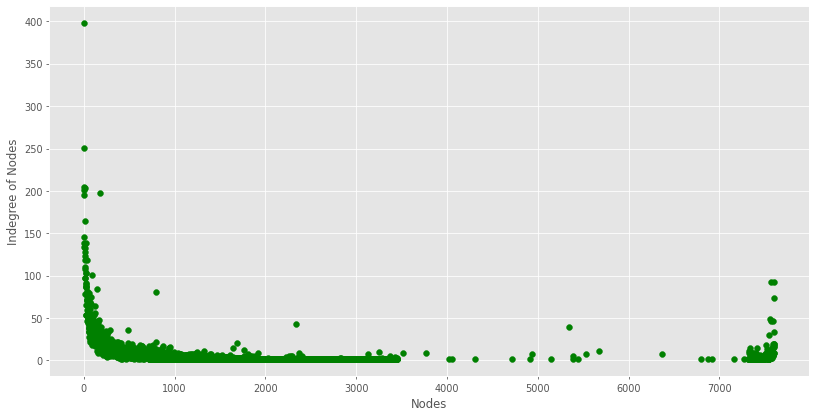

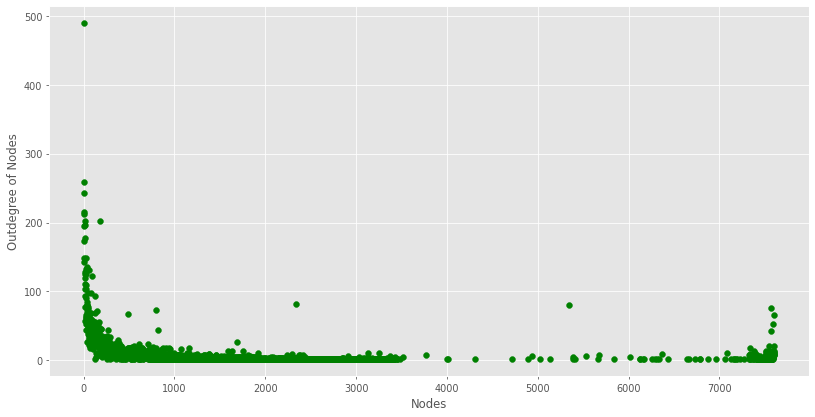

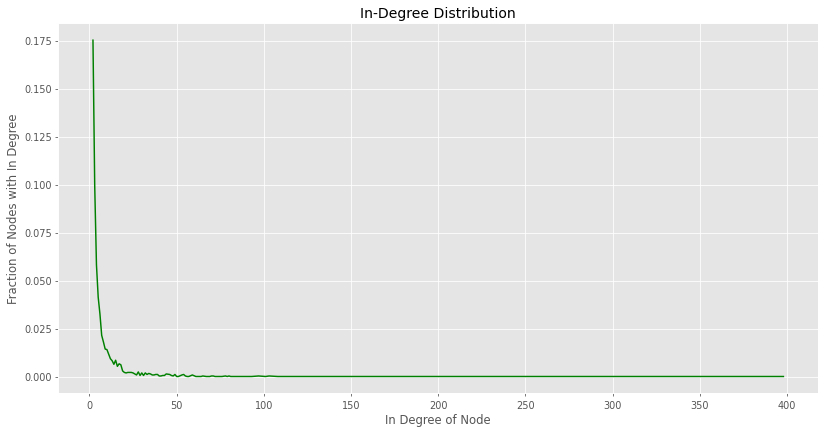

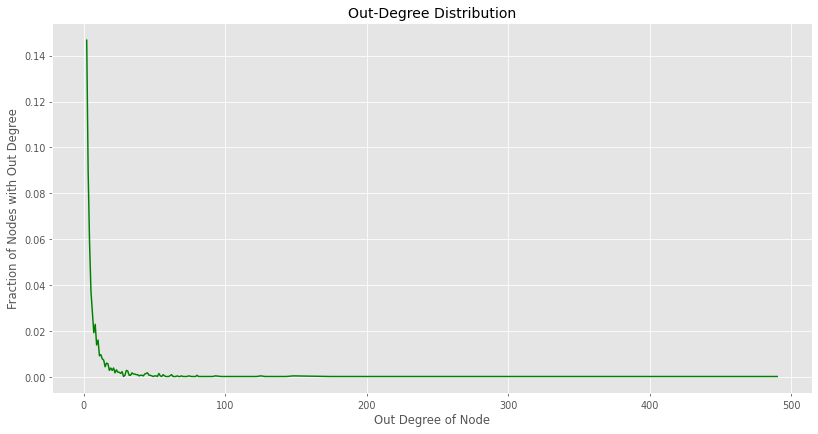

In [ ]:
style.use('ggplot')

x_in = in_deg.keys()
y_in = in_deg.values()
plt.figure(figsize=(14, 7), dpi=70)
plt.xlabel('Nodes')
plt.ylabel('Indegree of Nodes')
plt.scatter(x_in, y_in, color = 'g')
plt.show()

x_out = out_deg.keys()
y_out = out_deg.values()
plt.figure(figsize=(14, 7), dpi=70)
plt.xlabel('Nodes')
plt.ylabel('Outdegree of Nodes')
plt.scatter(x_out, y_out, color = 'g')
plt.show()

frac_indeg = {}
for key in in_deg.keys():
  deg = in_deg[key]
  if deg not in frac_indeg.keys():
    frac_indeg[deg] = 1
  else:
    frac_indeg[deg] += 1
for key in frac_indeg.keys():
  frac_indeg[key] = frac_indeg[key]/len(nodes)

sorted_frac_indeg = dict(sorted(frac_indeg.items()))
plt.figure(figsize=(14, 7), dpi=70)
plt.xlabel('In Degree of Node')
plt.ylabel('Fraction of Nodes with In Degree')
plt.title('In-Degree Distribution')
plt.plot(list(sorted_frac_indeg.keys())[1:], list(sorted_frac_indeg.values())[1:], color = 'g')
plt.show()

frac_outdeg = {}
for key in out_deg.keys():
  deg = out_deg[key]

  if deg not in frac_outdeg:
    frac_outdeg[deg] = 1

  else:
    frac_outdeg[deg] += 1
    
for key in frac_outdeg:
  frac_outdeg[key] = frac_outdeg[key]/len(nodes)

sorted_frac_outdeg = dict(sorted(frac_outdeg.items()))
plt.figure(figsize=(14, 7), dpi=70)
plt.xlabel('Out Degree of Node')
plt.ylabel('Fraction of Nodes with Out Degree')
plt.title('Out-Degree Distribution')
plt.plot(list(sorted_frac_outdeg.keys())[1:], list(sorted_frac_outdeg.values())[1:], color = 'g')
plt.show()

### **Q1 Part(2):**

### Cluster Coefficient

In [ ]:
adj_matrix = adj_mat.to_numpy()
avg_cluster_coef=0
coef = []
for node in range(adj_matrix.shape[0]):
  conn_edges=0
  conn_nodes=np.where(adj_matrix[node]>0)[0]
  if len(conn_nodes)>1:
    for i in conn_nodes:
      for j in conn_nodes:
        if adj_matrix[i][j]>0 and i!=j:
          conn_edges+=1
    conn_edges/=2
    coef.append(2*conn_edges/(len(conn_nodes)*(len(conn_nodes)-1)))
    avg_cluster_coef+=(2*conn_edges/(len(conn_nodes)*(len(conn_nodes)-1)))
  

avg_cluster_coef/=adj_matrix.shape[0]
print("The Avg. Clustering Coefficient is ",avg_cluster_coef)

The Avg. Clustering Coefficient is  0.15255370236987909


In [ ]:
print(adj_matrix)

array([[0, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 1, 0, 0]])

### Cluster Coefficient Distribution

In [ ]:
fraction_nodes = {}
for i in range(0,len(coef)):
  coeff = coef[i]

  if coeff not in fraction_nodes:
    fraction_nodes[coeff] = 1

  else:
    fraction_nodes[coeff] += 1
for node in fraction_nodes:
    fraction_nodes[node] = fraction_nodes[node] / len(nodes)

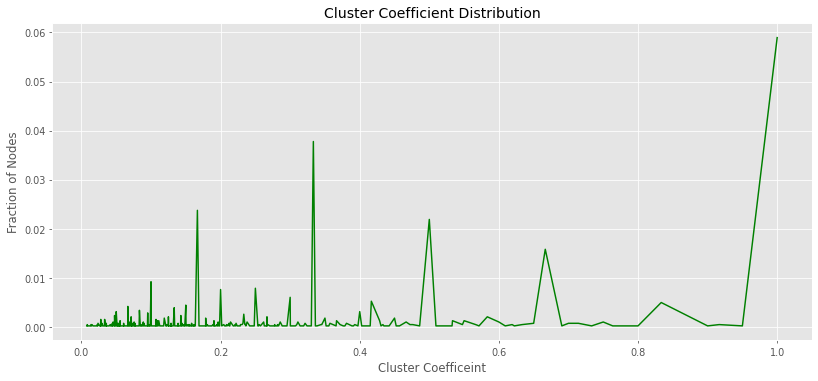

In [ ]:
style.use('ggplot')
fraction_nodes = dict(sorted(fraction_nodes.items()))
plt.figure(figsize=(14, 6), dpi=70)
plt.xlabel('Cluster Coefficeint')
plt.ylabel('Fraction of Nodes')
plt.plot(list(fraction_nodes.keys())[1:], list(fraction_nodes.values())[1:], color = 'g')
plt.title('Cluster Coefficient Distribution')
plt.xlabel('Cluster Coefficeint')
plt.ylabel('Fraction of Nodes')
plt.show()